# IRIS Dataset
<b>It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

  The columns in this dataset are:
</b><br>
<b>1.  Id </b><br>
<b>2.  SepalLength in cm</b> <br>
<b>3.  SepalWidth in cm</b> <br>
<b>4.  PetalLength in cm</b> <br>
<b>5.  PetalWidth in cm</b><br>
<b>6.  Species</b> <br>

# Import modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Loading Dataset

In [6]:
dataframe = pd.read_csv('Iris.csv')
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Delete id column
dataframe =  dataframe.drop(columns=['Id'])
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Stats about dataset
dataframe.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# To display  number of  samples in each class
dataframe["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Exploratory data analysis

<AxesSubplot:>

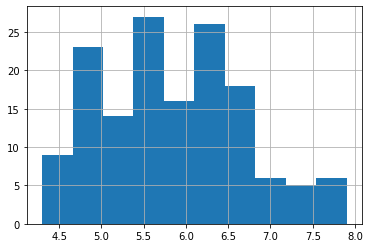

In [17]:
dataframe["SepalLengthCm"].hist()
# Normal Distribution

<AxesSubplot:>

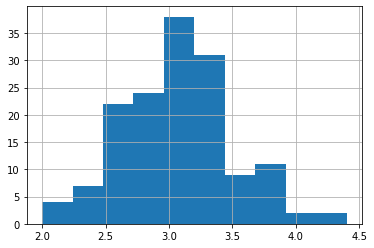

In [16]:
dataframe["SepalWidthCm"].hist()
# Normal Distribution

<AxesSubplot:>

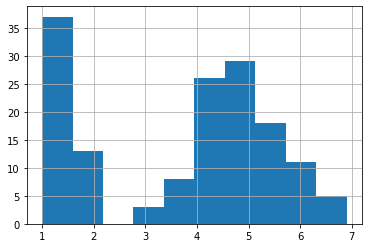

In [18]:
dataframe["PetalLengthCm"].hist()
# One class  is seperating from another one 

<AxesSubplot:>

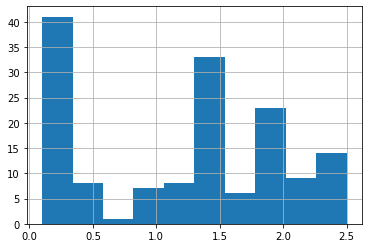

In [19]:
dataframe["PetalWidthCm"].hist()
# One class is seperating from another one

In [27]:
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]
colours=["ro","bo","go"]

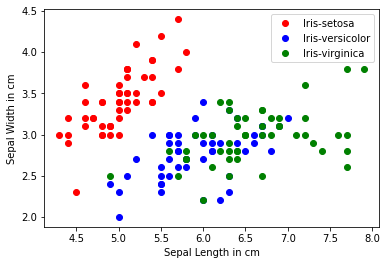

In [29]:
for i in range(0,3):
    x = dataframe[dataframe['Species']==species[i]]
    plt.plot(x["SepalLengthCm"],x["SepalWidthCm"],colours[i],label=species[i])
plt.xlabel("Sepal Length in cm")
plt.ylabel("Sepal Width in cm")
plt.legend()
plt.show()

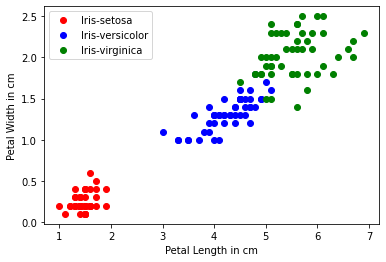

In [32]:
for i in range(0,3):
    x = dataframe[dataframe['Species']==species[i]]
    plt.plot(x["PetalLengthCm"],x["PetalWidthCm"],colours[i],label=species[i])
plt.xlabel("Petal Length in cm")
plt.ylabel("Petal Width in cm")
plt.legend()
plt.show()

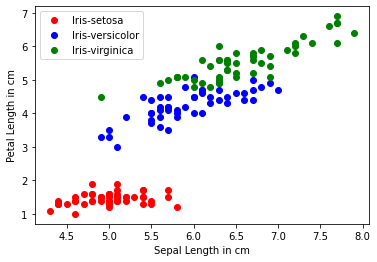

In [33]:
for i in range(0,3):
    x = dataframe[dataframe['Species']==species[i]]
    plt.plot(x["SepalLengthCm"],x["PetalLengthCm"],colours[i],label=species[i])
plt.xlabel("Sepal Length in cm")
plt.ylabel("Petal Length in cm")
plt.legend()
plt.show()

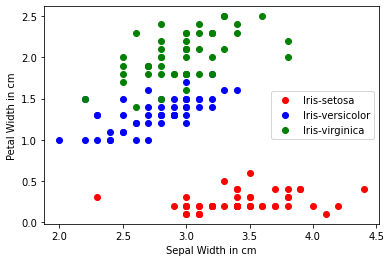

In [34]:
for i in range(0,3):
    x = dataframe[dataframe['Species']==species[i]]
    plt.plot(x["SepalWidthCm"],x["PetalWidthCm"],colours[i],label=species[i])
plt.xlabel("Sepal Width in cm")
plt.ylabel("Petal Width in cm")
plt.legend()
plt.show()

# Correlation Matrix
<br>Used to remove some corelated features to reduce overfitting


<AxesSubplot:>

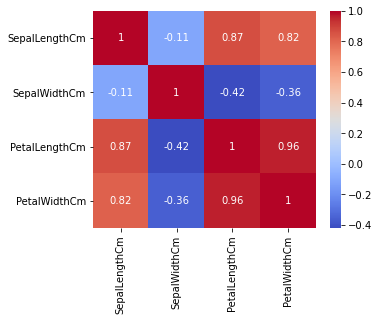

In [40]:
corr=dataframe.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot = True, ax=ax,cmap="coolwarm")

# Label Encoder

Converting string data into numeric form

In [41]:
from sklearn.preprocessing import LabelEncoder
lenc= LabelEncoder()

In [43]:
dataframe['Species']=lenc.fit_transform(dataframe['Species'])
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [78]:
#Model Training
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = dataframe.drop(columns=['Species'])
Y = dataframe['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [79]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [80]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [81]:
#Print metric
print("Accuracy :",model.score(X_test,Y_test)*100,"%")

Accuracy : 96.66666666666667 %


In [91]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

In [92]:
model2.fit(X_train,Y_train)

KNeighborsClassifier()

In [93]:
print("Accuracy :",model2.score(X_test,Y_test)*100,"%")

Accuracy : 96.66666666666667 %
